In [2]:
!pip install seaborn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

plt.style.use('seaborn-v0_8')

In [5]:
from google.colab import drive
data_path = '/content/abalone.data'

column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

data = pd.read_csv(data_path, names=column_names)

print("Dataset Shape:", data.shape)
print("\nFirst few rows:")
display(data.head())
print("\nDataset Information:")
display(data.info())

Dataset Shape: (4177, 9)

First few rows:


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

***task1***  Visualize the data (scatter plot, correlation matrix)

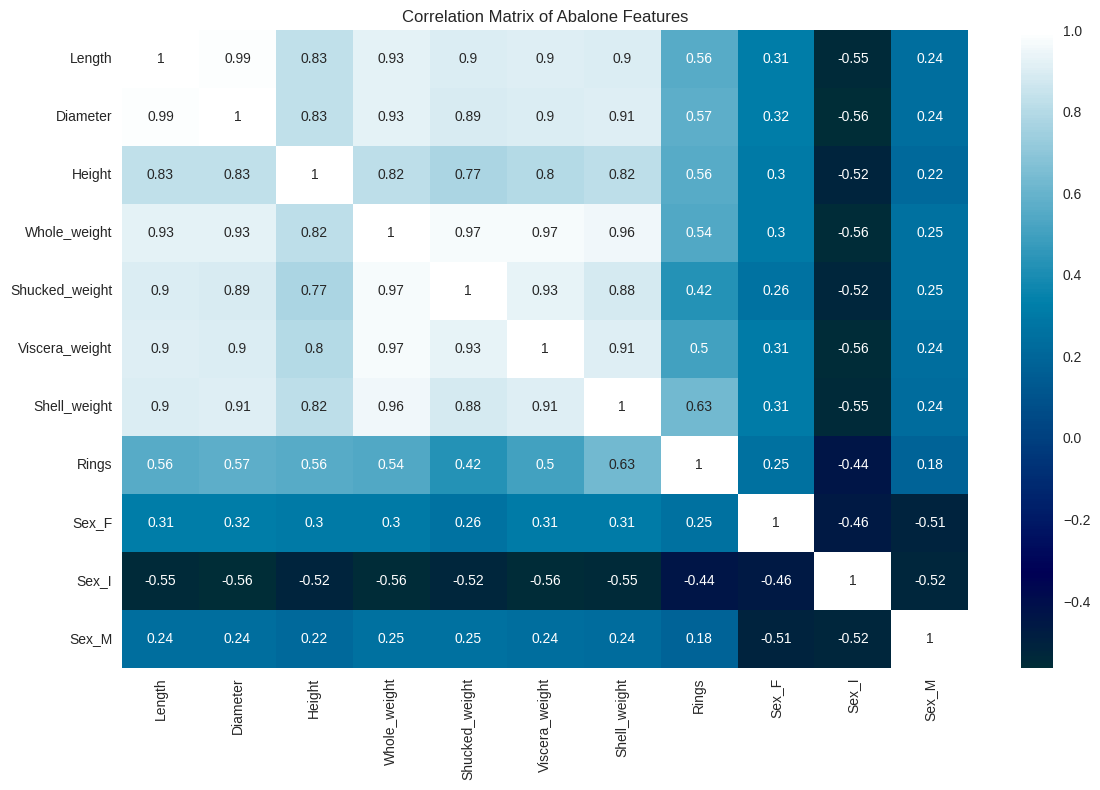

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
data_encoded = pd.get_dummies(data, columns=['Sex'], drop_first=False)
sns.heatmap(data_encoded.corr(), annot=True, cmap='ocean', center=0)

plt.title('Correlation Matrix of Abalone Features')
plt.tight_layout()
plt.show()

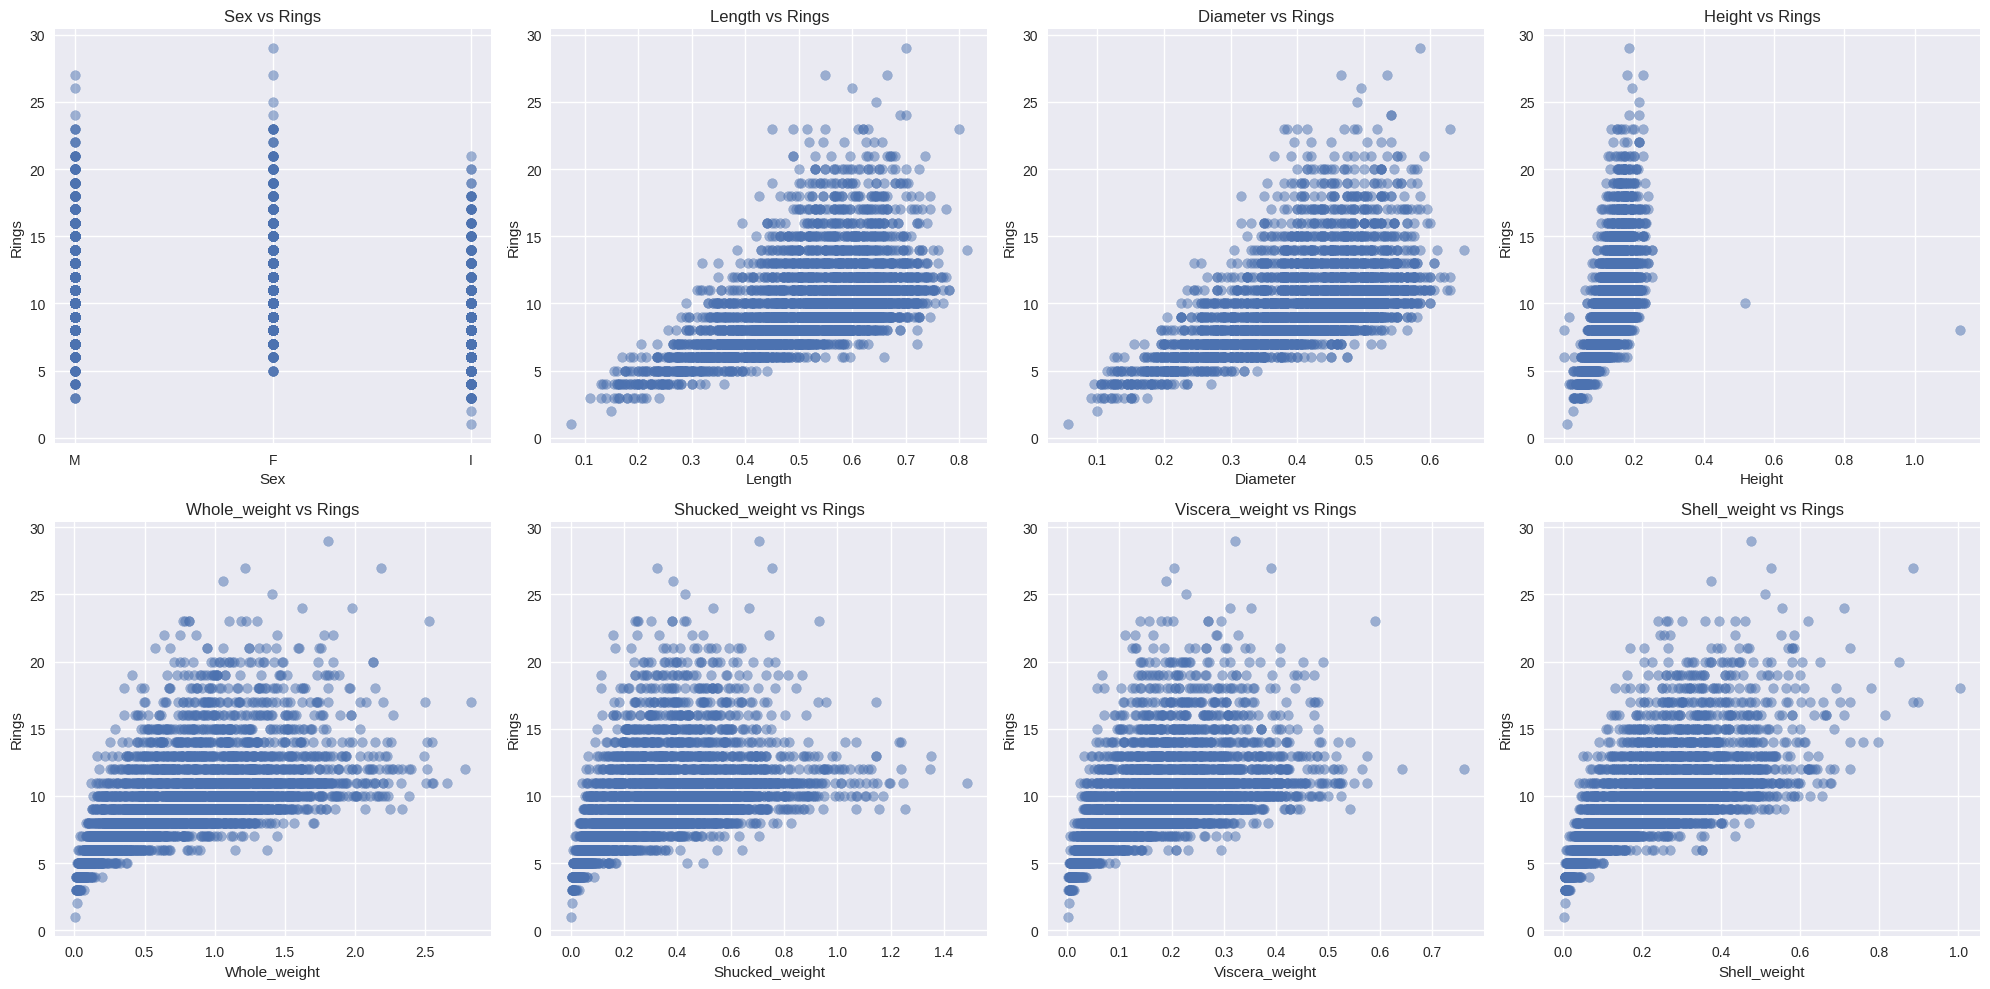

In [7]:
features = [col for col in data.columns]
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(features):
    if idx < len(axes):
        axes[idx].scatter(data[feature], data['Rings'], alpha=0.5)
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Rings')
        axes[idx].set_title(f'{feature} vs Rings')
    else:
        break

plt.tight_layout()
plt.show()

***task2*** Split the dataset into train and test in proportion of 80% to 20%

In [8]:
X = data.drop('Rings', axis=1)
y = data['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3341, 8)
Testing set shape: (836, 8)


***task3*** Train the Linear Regression model (present intercept, estimates, std. error, t-value and p-value
of your model)

In [10]:
import statsmodels.api as sm

if 'Sex' in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=['Sex'], drop_first=True)
if 'Sex' in X_test.columns:
    X_test = pd.get_dummies(X_test, columns=['Sex'], drop_first=True)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

intercept = model.params['const']

print(model.summary())
print(f"Intercept: {intercept:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     425.5
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:24:21   Log-Likelihood:                -7355.4
No. Observations:                3341   AIC:                         1.473e+04
Df Residuals:                    3331   BIC:                         1.479e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7435      0.330     11.

***task4*** Predict the dependent variable on the test data (present bias andvariance curve)

1.   List item
2.   List item



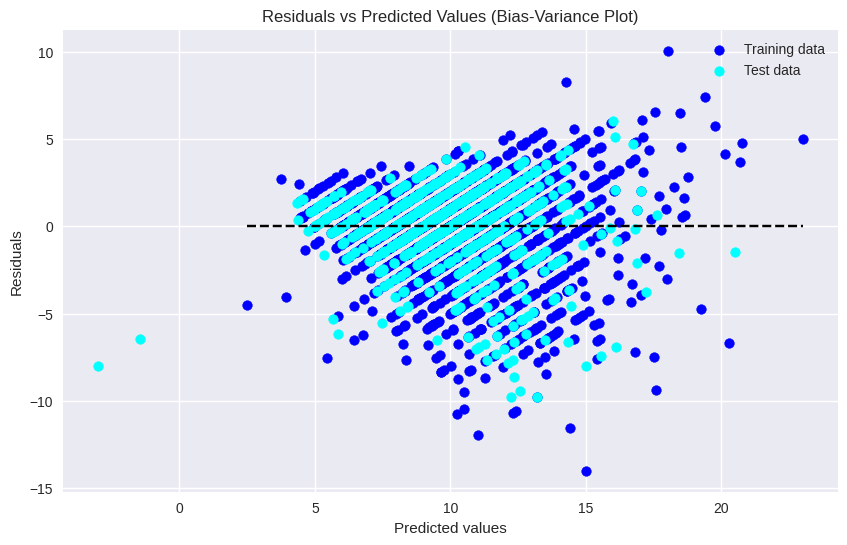

In [11]:
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)
train_pred = model_sk.predict(X_train)
test_pred = model_sk.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(train_pred, train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(test_pred, test_pred - y_test, c='aqua', marker='o', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=min(train_pred), xmax=max(train_pred), color='black', linestyle='--')
plt.title('Residuals vs Predicted Values (Bias-Variance Plot)')
plt.show()


***task5***   Evaluate the model (Mean Square Error, Root Mean Square Error, Mean Absolute Error, R
Square)

In [12]:
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error: 4.8912
Root Mean Squared Error: 2.2116
Mean Absolute Error: 1.5931
R-squared Score: 0.5482


***task6*** Explain and comment on your results (present actual vs predicted graph)

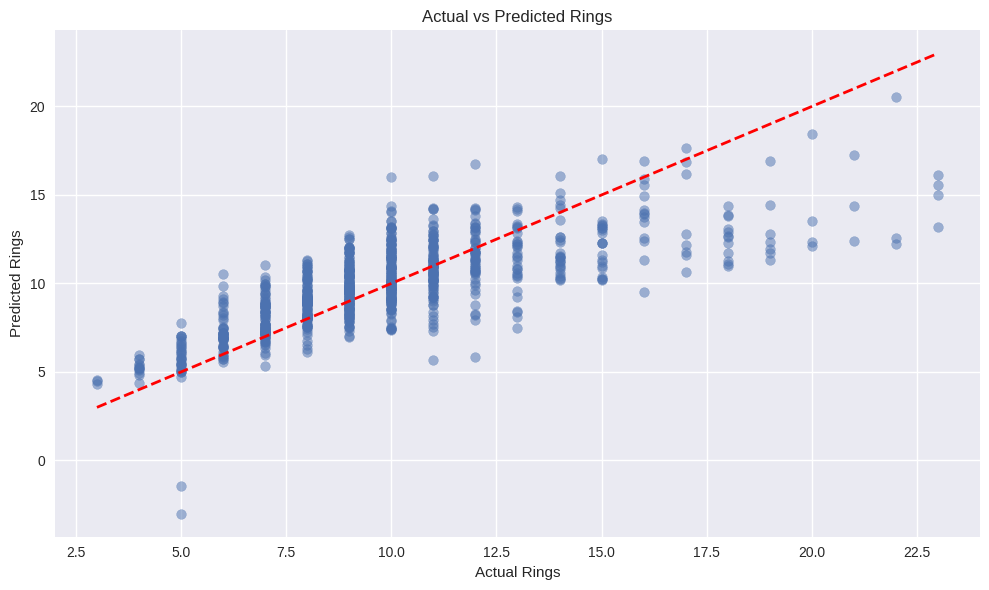

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted Rings')
plt.tight_layout()
plt.show()


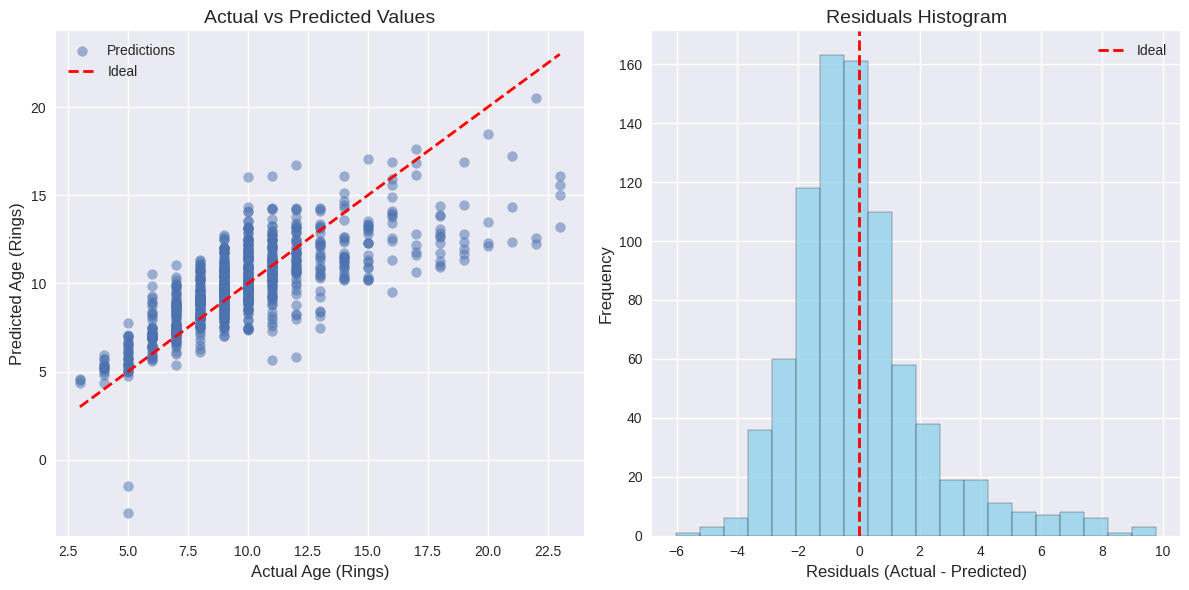

In [15]:
from sklearn.model_selection import train_test_split
X = data.drop('Rings', axis=1)
y = data['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import numpy as np
residuals = y_test - test_pred
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, test_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal")
plt.xlabel('Actual Age (Rings)', fontsize=12)
plt.ylabel('Predicted Age (Rings)', fontsize=12)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label='Ideal')
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residuals Histogram', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()
